<a href="https://colab.research.google.com/github/zi-onion/24-2-ESAA/blob/main/11_18_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch4. 1~3 p.142-181

# part04 합성곱 신경망(CNN)

## 1. 합성곱 신경망 CNN(Convonlutional Neural Network)
 - 대표적으로 image classification, object detection, style transfer

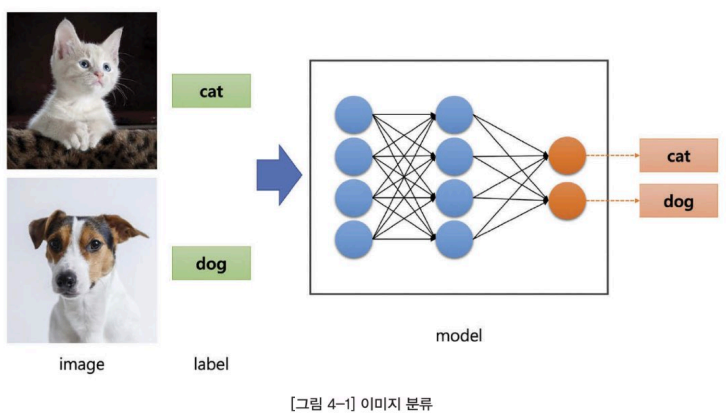

객체 탐지 사례. 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술. 고양이 이미지의 위치에 표시된 노란색 실선을 경계박스 bounding box라고 부름. 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려준다.
- 일반적으로 객체의 위치는 이미지의 좌표값. -> 경계 박스 찾는 문제는 회귀 분석으로 해결.
- 클래스 예측 문제는 분류 문제

### 1-1 이미지 표현
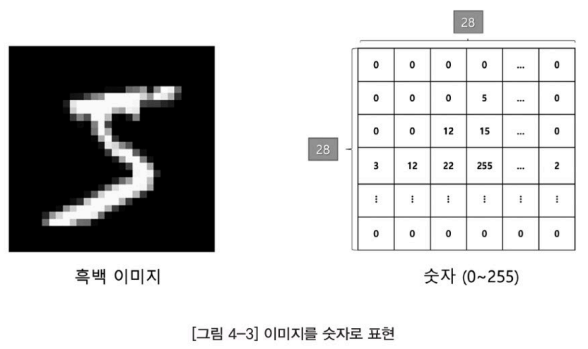

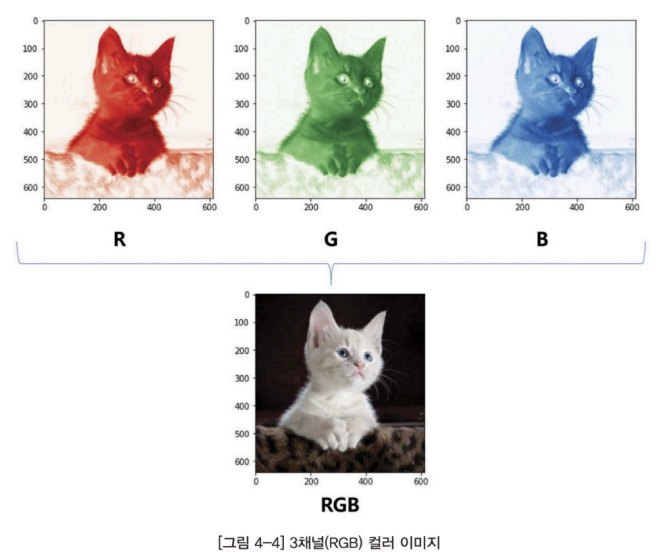

### 1-2 합성곱 Convolution
- 합성곱 연산은 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 kernel을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법.
- 합성곱 연산을 통해서 추출된 이미지를 feature map. -> 딥러닝 모델 학습에 사용시 훨씬 더 좋은 성능.

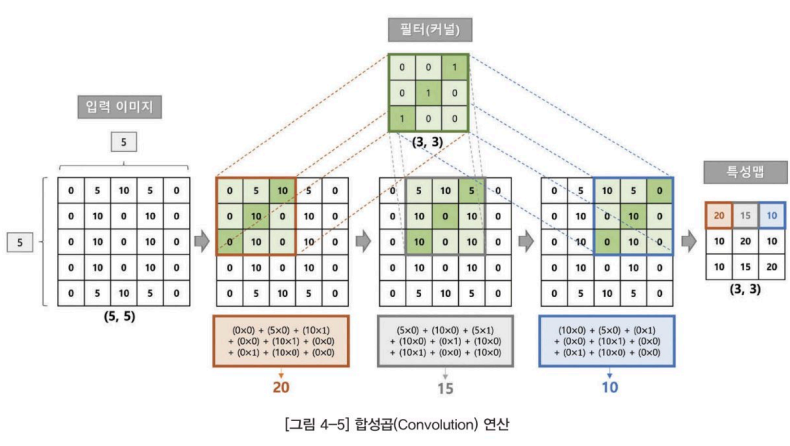

커널 사이즈가 3x3인 경우 총 9개의 weight를 가지며 back propagation 시 커널의 가중치를 업데이트함.
- 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치 shared weights 때문.
- 오차 역전파 시 커널의 gradient 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층 사용할 때보다 연산량이 훨씬 적다.

### 1-3 채널 Channel
- 입력 이미지를 구성하는 2차원 배열의 개수. 흑백 이미지는 단일 채널, 즉 채널의 개수가 1개인 이미지.
- 입력 이미지의 채널 개수만큼 커널이 생성, 각 ㅏ채널마다 하나씩 커널을 적용하여 합성곱 연산 수행 -> 합성곱 연산된 결과가 생성 -> element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성.
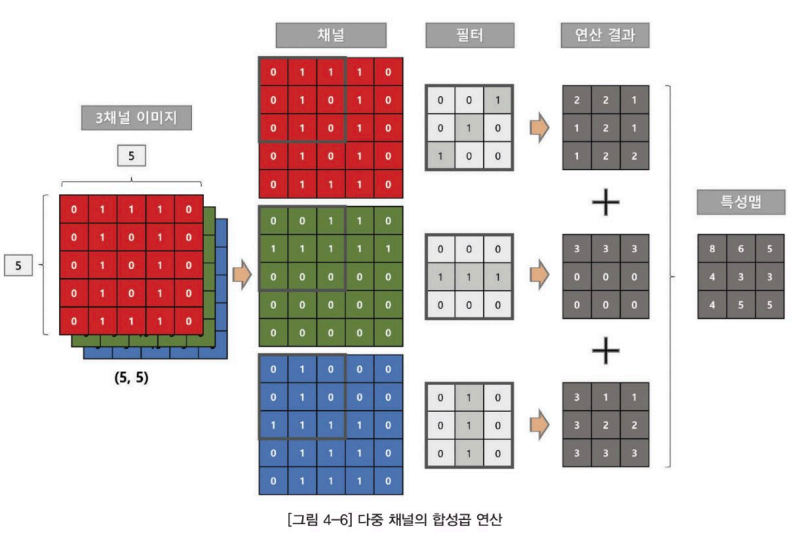

- 합성곱 레이어에 출력 필터의 개수를 20개로 설정했다면, 입력 이미지의 채널 개수 3개와 출력 필터의 개수 20개가 곱해져서 총 60개의 커널이 생성.
- 1개 커널 사이즈가 3x3이라면, 3x3x3(R,G,B)x20(출력 필터 수) =540개.; 해당 층에서 업데이트할 가중치의 그래디언트는 540개.
  - bias 추가로 계산. 20개의 출력 필터 개수만큼 추가.

### 1-4 스트라이드 stride
- 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채움. 이때 이동간격:stride. 주로 1 or 2.
  - if stride == 2: 특성맵의 크기가 1/2
  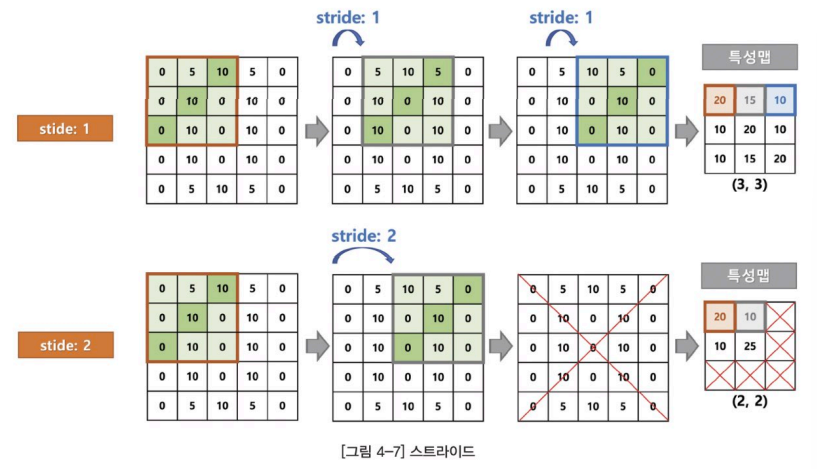

### 1-5 패딩 padding
- 커널 크기 3x3. 스트라이드에서 1로 설정하게 되는 경우, 추출된 특성맵의 사이즈는 입력 이미지 대비 가로로 2픽셀, 세로로 2픽셀씩 줄어들게 된다. but, 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 padding 설정 可.
- 앞의 그림과 같이 일반적으로 zero-padding을 사용하게 되며, 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채운 후 추출하게 됨. 패딩을 적용한 후 합성곱 연산을 수행하게 되면 특성맵의 크기가 줄어들지 않음.
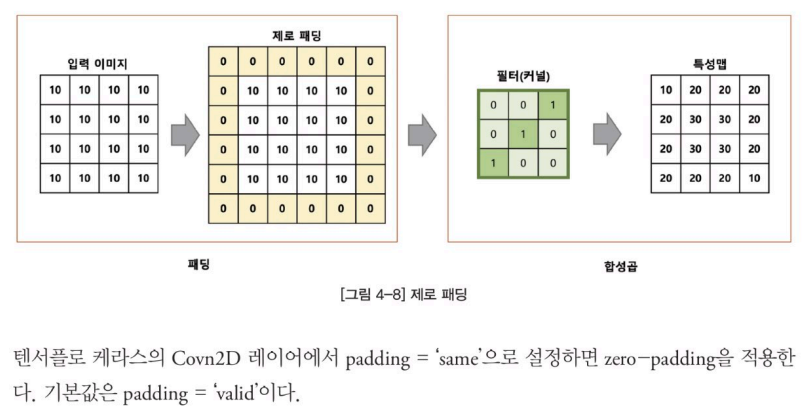

### 1-6 특성맵feature map 사이즈
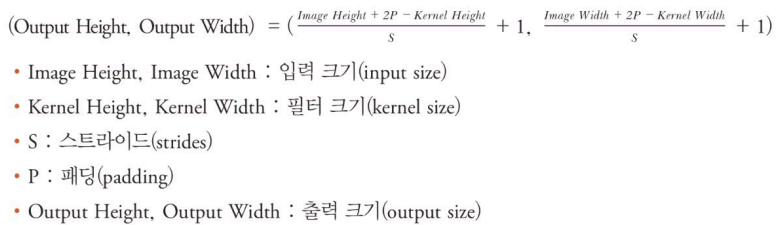

### 1-7 풀링 pooling
- pooling 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어.
  - 이점: 이미지 축소 -> 연산량 감소. 과대적합 방지.
  - 최대 풀링max pooling, 평균 풀링average pooling.
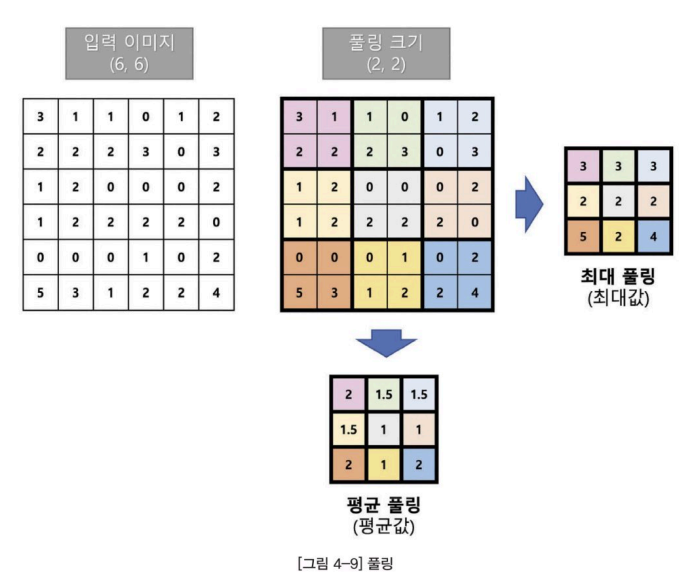

- 풀링 레이어도 스트라이드 값을 가짐.
  - if stride == 2, 2칸씩 건너뛰면서 풀링 수행.
  - 최대 풀링의 커널 크기 2x2, 스트라이드 2 => 입력 이미지 대비 세로 1/2, 가로 1/2 => 이미지 대비 총 1/4 크기로 줄어듦.

## 2. 간단한 모델 생성

### 2-1 데이터 로드 및 전처리

In [1]:
!pip install --upgrade tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
# tensorflow 모듈 import
import tensorflow as tf

In [3]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


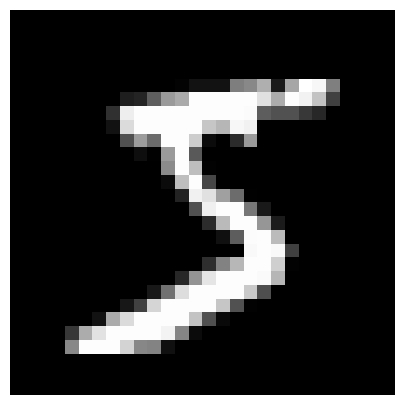

In [4]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [5]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [6]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [7]:
'''
mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성.
CNN 모델에 주입하기 위해서 색상을 나타내는 채널을 추가해줌.
tf.newaxis 축을 텐서 배열에 직접 추가하는 방식.
'''

# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


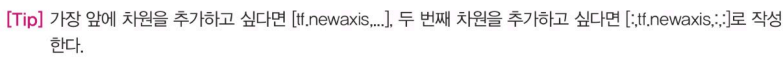

### 2-2 Sequential API로 모델 생성 및 학습
- Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델을 만듦.

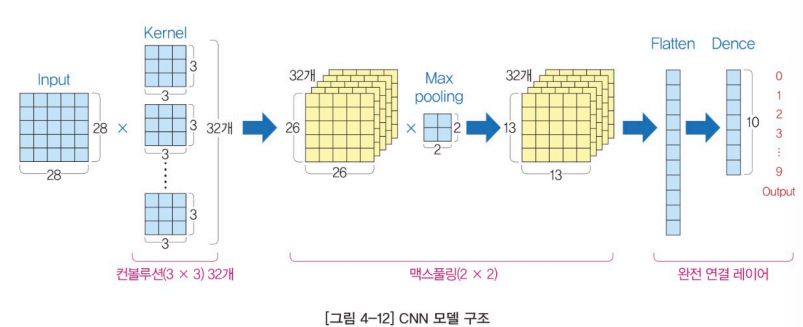

In [8]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

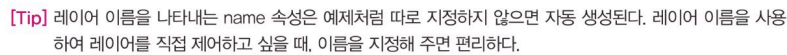

In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 18ms/step - loss: 0.2016 - accuracy: 0.9432 - val_loss: 0.0803 - val_accuracy: 0.9770
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0745 - accuracy: 0.9781 - val_loss: 0.0590 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0570 - accuracy: 0.9833 - val_loss: 0.0501 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0500 - val_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0409 - accuracy: 0.9877 - val_loss: 0.0515 - val_accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0550 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0525 -

In [10]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 3s 8ms/step - loss: 0.0653 - accuracy: 0.9810


[0.06530959159135818, 0.9810000061988831]

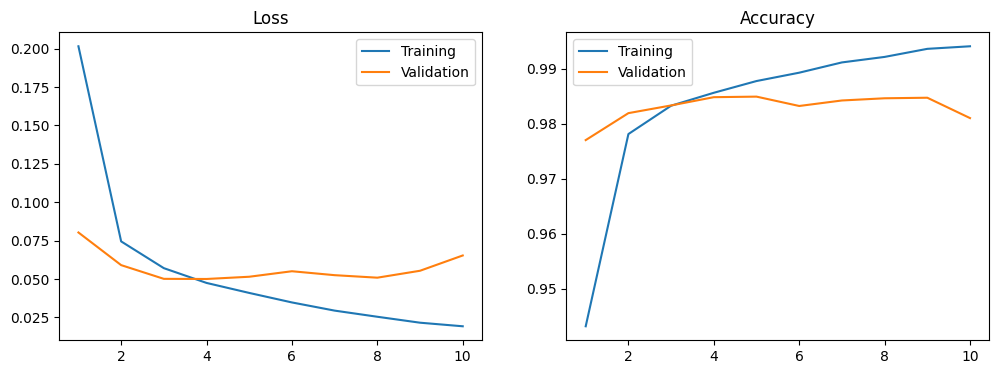

In [11]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

### 2-3 모델 구조 파악
- 모델 인스턴스에 summary() 메소드를 적용해주면, 모델의 구조를 요약해서 보여줌.
- 각 레이어의 이름과 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터 개수를 알 수 있음.
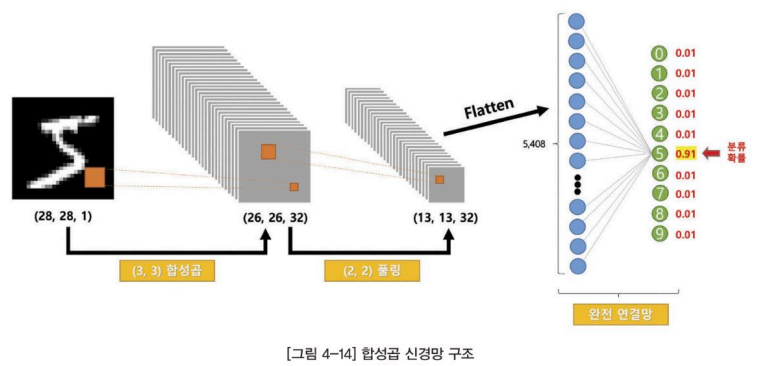

In [12]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [14]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [15]:
# 레이어
model.layers

In [16]:
# 첫번째 레이어 선택
model.layers[0]

In [17]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [19]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.26331902e+00,  1.53885901e-01, -3.00160591e-02,
            2.55376369e-01, -1.36011153e-01, -5.93793631e-01,
            4.21779245e-01,  1.61036521e-01, -8.30433607e-01,
            2.08570540e-01,  2.65100718e-01, -5.76071627e-02,
            3.66492450e-01,  6.08621716e-01, -8.33255947e-02,
           -3.81862760e-01, -1.42643309e+00,  1.80223823e-01,
           -4.78253543e-01, -4.04237270e-01, -9.22200605e-02,
            3.97673279e-01, -8.29848349e-01, -3.78220081e-01,
           -8.70240629e-01, -8.78709972e-01,  1.62115723e-01,
           -1.14126161e-01,  2.31333654e-02,  1.03990056e-01,
           -1.11566737e-01, -1.10003771e-02]],
 
         [[-8.07675898e-01,  3.40040654e-01, -7.37232193e-02,
            1.15791671e-01, -4.24257696e-01,  3.01789373e-01,
            4.89298515e-02,  3.91837358e-01,  1.24239139e-01,
            2.07640350e-01,  6.07746005e-01, -5.70416093e-01,
           

In [20]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.26331902e+00,  1.53885901e-01, -3.00160591e-02,
           2.55376369e-01, -1.36011153e-01, -5.93793631e-01,
           4.21779245e-01,  1.61036521e-01, -8.30433607e-01,
           2.08570540e-01,  2.65100718e-01, -5.76071627e-02,
           3.66492450e-01,  6.08621716e-01, -8.33255947e-02,
          -3.81862760e-01, -1.42643309e+00,  1.80223823e-01,
          -4.78253543e-01, -4.04237270e-01, -9.22200605e-02,
           3.97673279e-01, -8.29848349e-01, -3.78220081e-01,
          -8.70240629e-01, -8.78709972e-01,  1.62115723e-01,
          -1.14126161e-01,  2.31333654e-02,  1.03990056e-01,
          -1.11566737e-01, -1.10003771e-02]],

        [[-8.07675898e-01,  3.40040654e-01, -7.37232193e-02,
           1.15791671e-01, -4.24257696e-01,  3.01789373e-01,
           4.89298515e-02,  3.91837358e-01,  1.24239139e-01,
           2.07640350e-01,  6.07746005e-01, -5.70416093e-01,
           2.05296382e-01,  

In [21]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.03117011, -0.18917838, -0.18953246, -0.2921143 , -0.14134663,
       -0.07071055, -0.13744609, -0.06093454, -0.04692693, -0.34733206,
       -0.03188756, -0.00825006, -0.2811292 ,  0.15855598, -0.01427145,
       -0.11234171,  0.09531113, -0.13511594, -0.01776005, -0.06281652,
        0.02580504, -0.43227246, -0.14283663, -0.0399905 , -0.05229956,
       -0.08535711, -0.33906668, -0.08236108, -0.19149585, -0.00534562,
       -0.08628076, -0.17379645], dtype=float32)>

In [22]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [23]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]] )
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 87ms/step


2

In [24]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

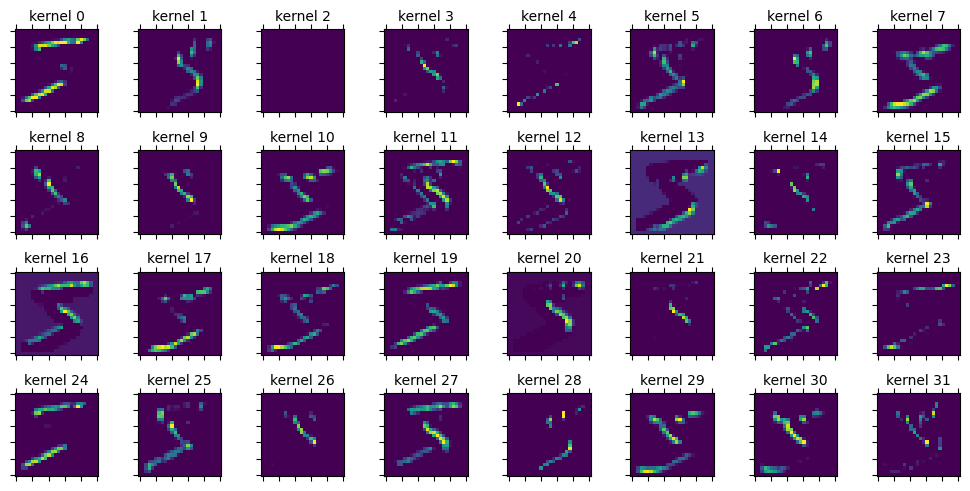

In [25]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


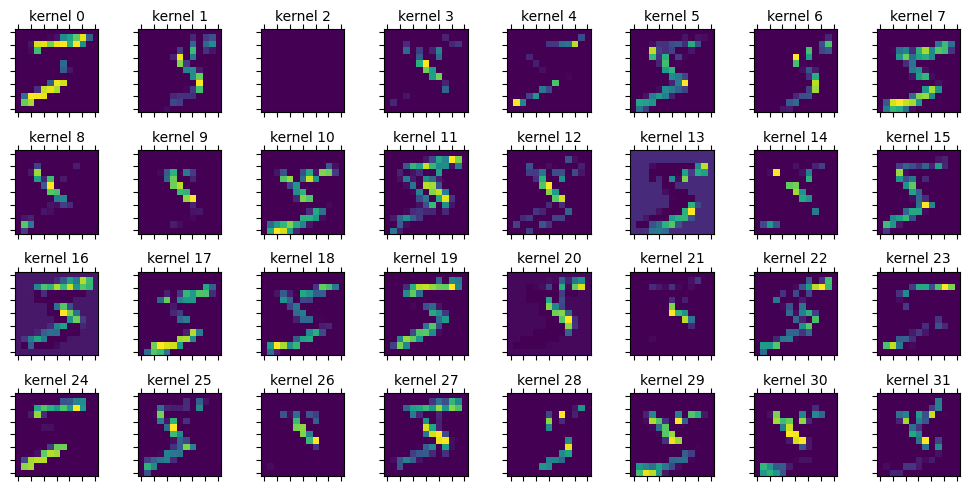

In [27]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 3. 복잡한 모델 생성

### 3-1 데이터셋 준비

In [28]:
import tensorflow as tf
import numpy as np

In [29]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


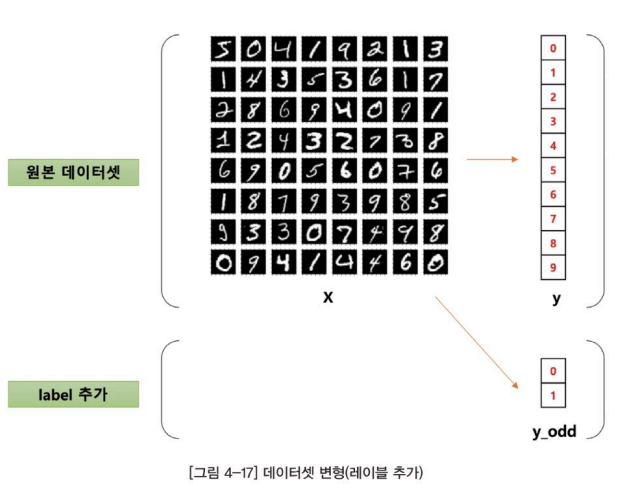

In [30]:
# 홀수인지 짝수인지를 판단하는 정답 y_odd 새로 만들어서 추가.

# 새로운 출력 값 배열 생성(홀수:1, 짝수:0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [31]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [32]:
# 검증 데이터셋에 대해서도 y_valid_odd

# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [33]:
'''
입력 이미지 데이터를 255로 나눠서 정규화하자.
색상이 하나인 모노컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1개로 지정.
텐서플로 expand_dims() 함수에 원본 배열을 입력하고,
새롭게 추가하려는 축의 인덱스를 지정하면 해당 인덱스에 새로운 축이 추가됨.
해당 코드에서는 축의 인덱스로 -1을 지정하였기 때문에 새로운 축은 끝에 추가.
(60000, 28, 28) -> (60000, 28, 28, 1)
'''
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성.
- Functional API를 사용하면 사용자가 원하는 복잡한 구조의 모델 만들 수 있음.
- 앞에서 다룬 Sequential API의 경우 레이어를 층층이 한 줄로 연결할 수밖에 없음.

In [34]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

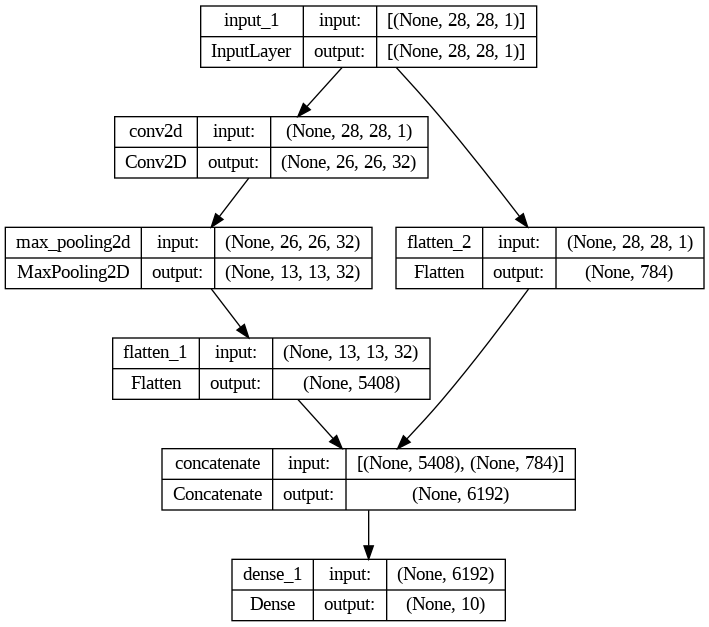

In [35]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'functional_cnn.png')

In [36]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.2117 - accuracy: 0.9396 - val_loss: 0.0859 - val_accuracy: 0.9747
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0778 - accuracy: 0.9775 - val_loss: 0.0641 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0590 - accuracy: 0.9823 - val_loss: 0.0619 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0562 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0578 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0580 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.0636 -

### 3-3 다중 출력 분류 모델
- 두 가지 서로 다른 분류 문제를 예측하는 다중 출력 모델.

In [37]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [38]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


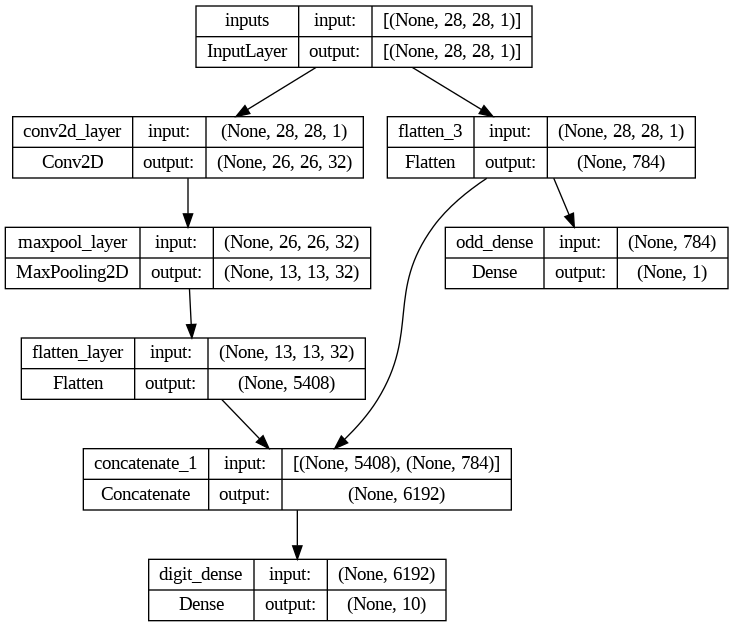

In [39]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

** 모델 컴파일 시 주의사항 **
- Dense 레이어에 name 속성으로 digit_dense 같은 이름을 지정했는데, 이 이름을 => key.
해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 => dictionary 형태.


In [40]:
'''
모델을 훈련시키기 위해 fit() 메소드를 적용할 때도 출력값을 2개 지정,
레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열 입력해야...
'''
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'},
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd},
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 17ms/step - loss: 0.3622 - digit_dense_loss: 0.2011 - odd_dense_loss: 0.3222 - digit_dense_accuracy: 0.9420 - odd_dense_accuracy: 0.8661 - val_loss: 0.2191 - val_digit_dense_loss: 0.0819 - val_odd_dense_loss: 0.2743 - val_digit_dense_accuracy: 0.9758 - val_odd_dense_accuracy: 0.8898
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2122 - digit_dense_loss: 0.0765 - odd_dense_loss: 0.2714 - digit_dense_accuracy: 0.9777 - odd_dense_accuracy: 0.8921 - val_loss: 0.2047 - val_digit_dense_loss: 0.0729 - val_odd_dense_loss: 0.2635 - val_digit_dense_accuracy: 0.9764 - val_odd_dense_accuracy: 0.8977
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1908 - digit_dense_loss: 0.0594 - odd_dense_loss: 0.2629 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.8956 - val_loss: 0.1867 - val_digit_dense_loss: 0.0571 - val_odd_dense_loss: 0.2593 - val_digit_dense_accuracy: 0.9803 -

In [41]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 3s 10ms/step - loss: 0.1909 - digit_dense_loss: 0.0630 - odd_dense_loss: 0.2559 - digit_dense_accuracy: 0.9829 - odd_dense_accuracy: 0.9008


[0.1909317821264267,
 0.06298288702964783,
 0.2558978199958801,
 0.9829000234603882,
 0.9007999897003174]

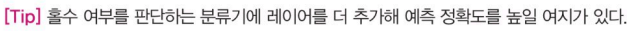

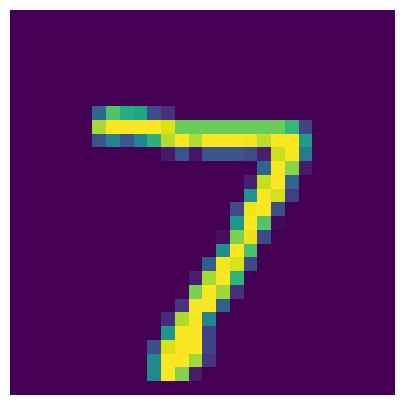

In [42]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [43]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 5s 16ms/step
[2.98308063e-13 2.58405053e-09 6.79920253e-09 9.21497758e-07
 1.03650644e-10 8.64653227e-12 1.12368679e-21 9.99998987e-01
 1.18347901e-10 9.96850957e-09]
[0.9994685]


In [44]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [45]:
odd_labels = (odd_preds>0.5).astype(np.int64).reshape(1, -1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 3-4 전이 학습 transfer learning
- 앞서 훈련한 모델의 일부를 가져와서 그대로 사용. 최종 출력층만 새롭게 추가하여 모델 재구성.
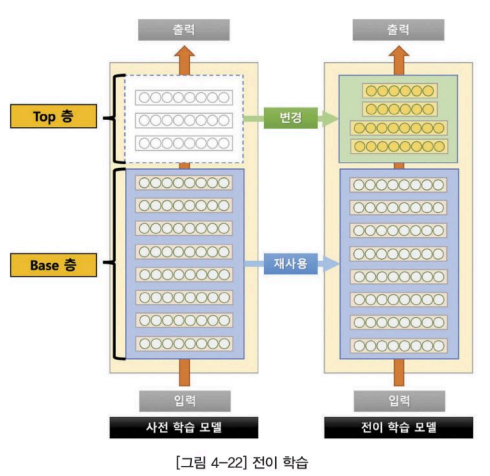

In [46]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


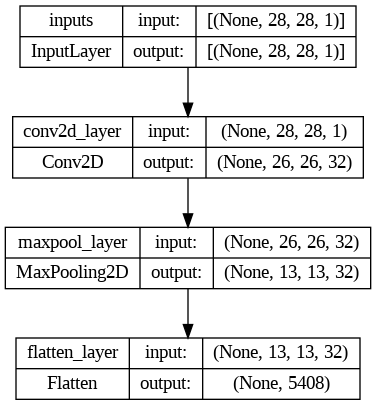

In [47]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [48]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


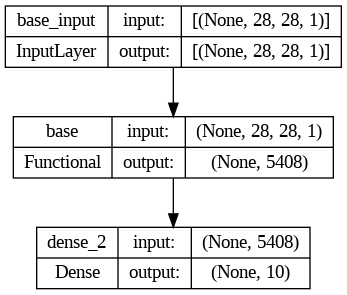

In [57]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')
## 노드 10개를 가진 분류기 역할을 하는 dense 레이어가 추가.

In [50]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1314 - accuracy: 0.9631 - val_loss: 0.0694 - val_accuracy: 0.9778
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0589 - val_accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.0493 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0503 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0569 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0242 - accuracy: 0.9927 - val_loss: 0.0555 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0516 -

In [51]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [52]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [53]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1168 - accuracy: 0.9682 - val_loss: 0.0620 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0530 - val_accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0517 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0232 - accuracy: 0.9932 - val_loss: 0.0478 - val_accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.0543 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0549 - val_ac

In [54]:
# 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정.
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [55]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [56]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1183 - accuracy: 0.9682 - val_loss: 0.0581 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0485 - accuracy: 0.9856 - val_loss: 0.0543 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.0511 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0555 - val_accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0550 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0627 - val_ac